In [89]:
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

### 1. Data Cleaning

In [90]:
def numeric_encoder(text):
    money = 0
    text = text.split(" ")
    if text[1] == "Tỷ":
        money += int(text[0])*1000
        if len(text) >= 4 and text[3] == "Triệu":
            money += int(text[2])
    else:
        money += int(text[0])
    return money

In [91]:
def remove_unit(text):
    text = text.split(" ")
    return text[0]

    Loading dataset and overview

In [92]:
car = pd.read_csv('car.csv',sep='|', engine='python', error_bad_lines=False,warn_bad_lines= False, index_col= False)
car.head()

,car_model,km,imp_exp,km_1,imp_exp_1,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,title,price,area,poster_name,poster_add,poster_tel
0,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2007,Acura MDX SH-AWD - 2007,630 Triệu,TP HCM,Liên hệ: Salon ô tô Thịnh Lợi,"Số 56+58+60 (C3/1 cũ) Phạm Hùng, Bình Chánh TP...",ĐT: 0961 258 258 - 0943 331 999
1,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Bạc,Đen,5 cửa,7 chỗ,Xe cũ,2007,Acura MDX SH-AWD - 2007,580 Triệu,Hà Nội,Liên hệ: Ngô Quốc Huy,Nguyễn khánh toán Hà Nội,ĐT: 0903 245 739
2,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Bạc,Nhiều màu,5 cửa,7 chỗ,Xe cũ,2006,Acura MDX SH-AWD - 2006,465 Triệu,TP HCM,Liên hệ: Salon Auto Toàn Phát,"C1/25 Phạm Hùng Chánh Hưng, Bình Chánh TP HCM",ĐT: 0903 951 109 - 0938 595 373
3,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Đen,Kem,5 cửa,7 chỗ,Xe mới,2016,Acura MDX 3.5L - 2016,4 Tỷ 665 Triệu,TP HCM,Liên hệ: Ôtô Ngọc Danh,"C3/02 Phạm Hùng, Quận 8 TP HCM",ĐT: 0919 726 666
4,acura-mdx,"9,600 Km",Nhập khẩu,"9,600 Km",Nhập khẩu,SUV,Trắng,Cát,5 cửa,7 chỗ,Xe cũ,2015,Acura MDX 3.5L - 2015,3 Tỷ 400 Triệu,TP HCM,Liên hệ: Siêu Thị Ô Tô An Sương,"Nguyễn Ảnh Thủ, Bà Điểm, Hóc Môn TP HCM",ĐT: 0789 455 699 - 0993 777 977


In [93]:
car.info()
car.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39422 entries, 0 to 39421
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   car_model    39422 non-null  object
 1   km           39422 non-null  object
 2   imp_exp      39422 non-null  object
 3   km_1         39422 non-null  object
 4   imp_exp_1    39422 non-null  object
 5   car_type     39422 non-null  object
 6   out_color    39422 non-null  object
 7   in_color     39422 non-null  object
 8   door_num     39422 non-null  object
 9   seat_num     39422 non-null  object
 10  new_old      39422 non-null  object
 11  car_year     39422 non-null  object
 12  title        39422 non-null  object
 13  price        39422 non-null  object
 14  area         39422 non-null  object
 15  poster_name  39422 non-null  object
 16  poster_add   39422 non-null  object
 17  poster_tel   39422 non-null  object
dtypes: object(18)
memory usage: 5.4+ MB


,car_model,km,imp_exp,km_1,imp_exp_1,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,title,price,area,poster_name,poster_add,poster_tel
count,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422
unique,573,2158,2,2158,2,10,18,18,12,35,2,32,5957,2113,63,13862,11298,16509
top,kia-morning,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Sedan,Trắng,Đen,5 cửa,5 chỗ,Xe cũ,2020,VinFast Fadil 1.4 AT - 2020,630 Triệu,Hà Nội,Liên hệ: A Hieu,Hà Nội Hà Nội,ĐT: 0978 669 999 - 0983 304 996
freq,1942,19798,23963,19798,23963,13615,11576,12904,19997,25761,27702,9358,207,278,15140,131,956,76


    Dropping unneccessary and correcting data types

In [94]:
car = car.drop(columns=['km_1', 'imp_exp_1', 'poster_name', 'poster_add', 'poster_tel','title'])
for i in car.index:
    car.at[i, "km"] = remove_unit(car.at[i, "km"]).replace(',','')
    car.at[i, "door_num"] = remove_unit(car.at[i, "door_num"])
    car.at[i, "seat_num"] = remove_unit(car.at[i, "seat_num"])
    car.at[i, "price"] = numeric_encoder(car.at[i, "price"])
    if  car.at[i, "car_year"] == '< 1990':
        car.at[i, "car_year"] = '1990'
car['km'] = car['km'].astype('int')
car['door_num'] = car['door_num'].astype('int')
car['seat_num'] = car['seat_num'].astype('int')
car['price'] = car['price'].astype('int')
car['car_year'] = car['car_year'].astype('int')

In [95]:
car.info()
car.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39422 entries, 0 to 39421
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   car_model  39422 non-null  object
 1   km         39422 non-null  int64 
 2   imp_exp    39422 non-null  object
 3   car_type   39422 non-null  object
 4   out_color  39422 non-null  object
 5   in_color   39422 non-null  object
 6   door_num   39422 non-null  int64 
 7   seat_num   39422 non-null  int64 
 8   new_old    39422 non-null  object
 9   car_year   39422 non-null  int64 
 10  price      39422 non-null  int64 
 11  area       39422 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.6+ MB


,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area
count,39422,3.942200e+04,39422,39422,39422,39422,39422.000000,39422.000000,39422,39422.000000,39422.000000,39422
unique,573,NaN,2,10,18,18,NaN,NaN,2,NaN,NaN,63
top,kia-morning,NaN,Lắp ráp trong nước,Sedan,Trắng,Đen,NaN,NaN,Xe cũ,NaN,NaN,Hà Nội
freq,1942,NaN,23963,13615,11576,12904,NaN,NaN,27702,NaN,NaN,15140
mean,NaN,1.191164e+06,NaN,NaN,NaN,NaN,4.394906,5.794379,NaN,2014.805362,928.937294,NaN
std,NaN,6.533826e+07,NaN,NaN,NaN,NaN,1.003306,2.938541,NaN,5.638348,1912.934486,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1990.000000,16.000000,NaN
25%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,2011.000000,320.000000,NaN
50%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,2016.000000,529.000000,NaN
75%,NaN,5.000000e+04,NaN,NaN,NaN,NaN,5.000000,7.000000,NaN,2019.000000,865.000000,NaN


    Inferences:
    + 'km' can't be too high but the max value is in millions
    + Old cars can't have less than 500 km on the odometer
    + New cars can't have more than 0 km on the odometer
    + Door number can't be less than 2
    + Seat number can't be less than 2

    Remove:
    + Duplicates

In [96]:
car[car.duplicated()]

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area
10,acura-mdx,80000,Nhập khẩu,SUV,Đen,Đen,5,7,Xe cũ,2007,555,Hà Nội
59,audi-q5,0,Nhập khẩu,SUV,Trắng,Nâu,5,5,Xe mới,2019,2400,Hà Nội
121,audi-a4,59000,Nhập khẩu,Sedan,Trắng,Đen,4,5,Xe cũ,2015,870,TP HCM
154,audi-q7,48000,Nhập khẩu,SUV,Đen,Đen,5,7,Xe cũ,2017,2680,Hà Nội
261,bmw-3_series,14000,Nhập khẩu,Sedan,Trắng,Kem,4,5,Xe cũ,2018,1299,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...
39081,hang_khac,200000,Lắp ráp trong nước,Van/Minivan,Trắng,Màu khác,1,47,Xe cũ,2014,400,Hà Nội
39082,hang_khac,200000,Lắp ráp trong nước,Van/Minivan,Trắng,Màu khác,1,47,Xe cũ,2014,430,Hà Nội
39191,hang_khac,0,Lắp ráp trong nước,Truck,Xanh,-,2,3,Xe cũ,2009,118,Phú Thọ
39202,hang_khac,200000,Lắp ráp trong nước,Van/Minivan,Trắng,Nhiều màu,1,47,Xe cũ,2014,430,Hà Nội


In [97]:
car = car.drop_duplicates()

    Remove:
    + Km noises
    + New cars problems
    + Old cars problems

In [98]:
old = car[car['new_old'] == 'Xe cũ']
old.nlargest(100, columns = 'km')

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area
13822,isuzu-hi_lander,4294967295,Lắp ráp trong nước,SUV,Vàng,Ghi,5,8,Xe cũ,2004,185,Hải Dương
17774,kia-forte,4294967295,Lắp ráp trong nước,Sedan,Bạc,Đen,4,5,Xe cũ,2013,330,Phú Thọ
26414,mitsubishi-pajero,4294967295,Lắp ráp trong nước,SUV,Xanh,Xanh,5,7,Xe cũ,1998,176,Hà Nội
31579,toyota-vios,4294967295,Lắp ráp trong nước,Sedan,Trắng,Vàng,4,5,Xe cũ,2018,430,Tuyên Quang
37416,lada,4294967295,Nhập khẩu,Sedan,Trắng,Trắng,4,4,Xe cũ,1990,25,Thừa Thiên Huế
...,...,...,...,...,...,...,...,...,...,...,...,...
27331,nissan-bluebird,10000000,Nhập khẩu,Sedan,Ghi,Ghi,4,5,Xe cũ,1992,55,Hà Nội
28392,suzuki-wagon_r+,10000000,Lắp ráp trong nước,Wagon,Xanh,Nâu,5,5,Xe cũ,2003,62,Hà Nội
29460,toyota-innova,10000000,Lắp ráp trong nước,Crossover,Ghi,Nâu,5,8,Xe cũ,2017,550,Hải Phòng
35167,toyota-hiace,10000000,Lắp ráp trong nước,Van/Minivan,Trắng,Bạc,4,16,Xe cũ,1997,35,Hà Giang


In [99]:
car = car[car['km'] <= 500000]

In [100]:
old = car[car['new_old'] == 'Xe cũ']
old = old[old['km'] <= 500]
car = car.drop(old.index, axis= 0)

In [101]:
new = car[car['new_old'] == 'Xe mới']
new = new[new['km'] > 0]
car = car.drop(new.index, axis= 0)

    Remove:
    + Door noises
    + Seat noises

In [102]:
car = car[car['door_num'] >=2]
car = car[car['door_num'] < 10]

In [103]:
seat = car[car['seat_num'] <2]
car = car[car['seat_num'] >=2]

    Brand splitting and save

In [104]:
def brand_split(df,target):
    brand = [df[target][i].split('-')[0] for i in range(len(df))]
    return brand

In [105]:
car = car.reset_index(drop = True)
car['brand'] = brand_split(car, 'car_model')

    Checking correctness of brand name

In [106]:
car['brand'].unique()

array(['acura', 'audi', 'bmw', 'chevrolet', 'daewoo', 'daihatsu', 'fiat',
       'ford', 'honda', 'hyundai', 'isuzu', 'kia', 'landrover', 'lexus',
       'mazda', 'mercedes_benz', 'mitsubishi', 'nissan', 'peugeot',
       'porsche', 'renault', 'suzuki', 'toyota', 'vinfast', 'volkswagen',
       'alfa_romeo', 'baic', 'bentley', 'brilliance', 'byd', 'cadillac',
       'changan', 'chery', 'chrysler', 'dodge', 'dongfeng', 'ferrari',
       'gaz', 'haima', 'hino', 'infiniti', 'jaguar', 'jeep', 'jrd',
       'lada', 'lamborghini', 'lifan', 'lincoln', 'luxgen', 'maserati',
       'mekong', 'mg', 'mini', 'opel', 'proton', 'ram', 'rolls_royce',
       'samsung', 'smart', 'ssangyong', 'subaru', 'tesla', 'thaco',
       'tobe', 'uaz', 'vinaxuki', 'volvo', 'zotye', 'hang_khac'],
      dtype=object)

In [107]:
car.to_csv('car_clean.csv', index = False)
car.describe(include= 'all')

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,area,brand
count,27629,27629.000000,27629,27629,27629,27629,27629.000000,27629.000000,27629,27629.000000,27629.000000,27629,27629
unique,518,NaN,2,10,18,18,NaN,NaN,2,NaN,NaN,63,69
top,kia-morning,NaN,Lắp ráp trong nước,Sedan,Trắng,Đen,NaN,NaN,Xe cũ,NaN,NaN,Hà Nội,toyota
freq,1201,NaN,16359,9662,8261,9544,NaN,NaN,17910,NaN,NaN,11397,5155
mean,NaN,42715.683087,NaN,NaN,NaN,NaN,4.434399,5.725759,NaN,2015.739766,1044.315610,NaN,NaN
std,NaN,57531.110388,NaN,NaN,NaN,NaN,0.696075,2.276105,NaN,5.009044,2103.785472,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1990.000000,16.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,2014.000000,382.000000,NaN,NaN
50%,NaN,24000.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,2017.000000,580.000000,NaN,NaN
75%,NaN,67000.000000,NaN,NaN,NaN,NaN,5.000000,7.000000,NaN,2020.000000,929.000000,NaN,NaN


    Infernces:
    + Most selling model is Kia - Morning
    + Most selling brand is Toyota
    + Mostly car are assembled 
    + Mostly Sedan
    + Mostly White
    + Old

### 2. Visualization

In [108]:
cols = list(car.columns)
car.dtypes

car_model    object
km            int64
imp_exp      object
car_type     object
out_color    object
in_color     object
door_num      int64
seat_num      int64
new_old      object
car_year      int64
price         int64
area         object
brand        object
dtype: object

#### 2.1 Categorical Features

In [109]:
def show_freq(target):
    if len(target.unique()) > 10:
        plt.figure(figsize=(12,7))
        target.value_counts()[:10].plot(kind='bar', color = 'teal',rot=0)
        plt.show()
    else:
        plt.figure(figsize=(12,7))
        target.value_counts().plot(kind='bar', color = 'teal',rot=0)
        #sns.countplot(car[target], color= 'teal')
        plt.show()

    Car Brand Frequency

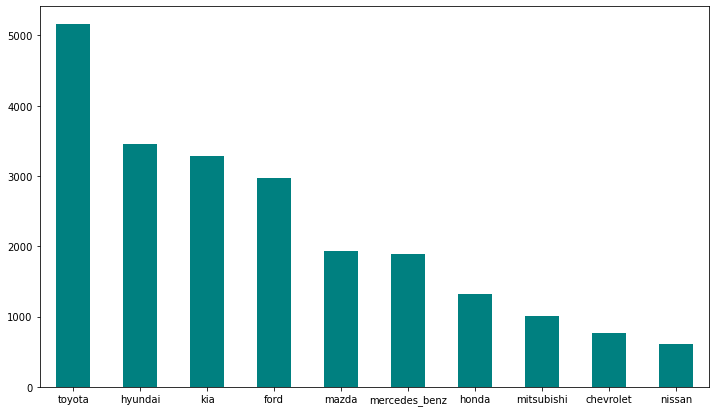

In [110]:
show_freq(car['brand'])

    Car Type Frequency

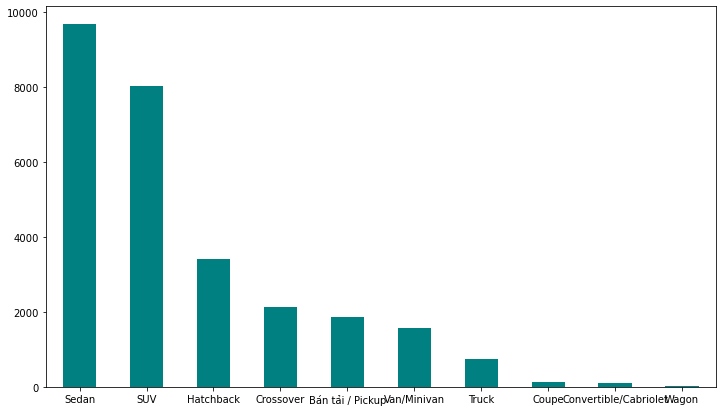

In [111]:
show_freq(car['car_type'])

    Inferences:
    + People seem to like Sedan, SUV and Hatchback

    Outside Color Frequency

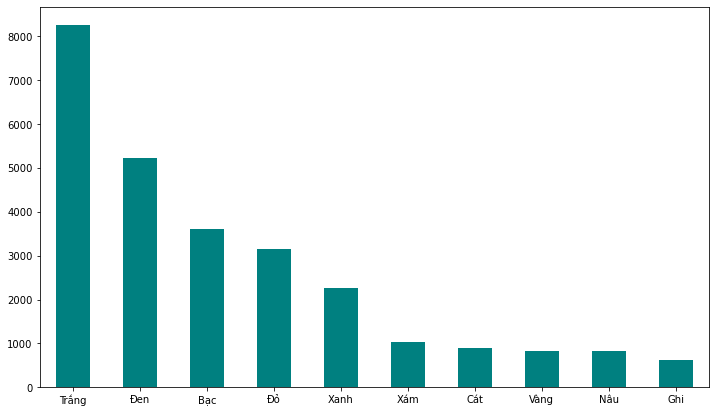

In [112]:
show_freq(car['out_color'])

    Inferences:
    + The outside color is a place of White, Black, Silver and Red is almost the same

        Inside Color Frequency

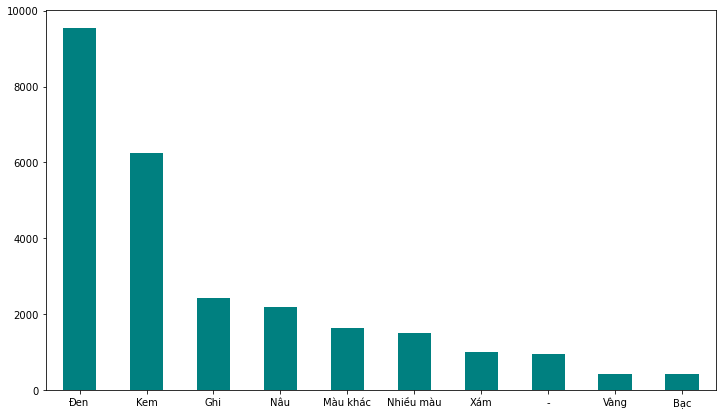

In [113]:
show_freq(car['in_color'])

    Inferences:
    + Black and Beige is the most color inside the car

#### 2.2 Numeric Features

In [114]:
def show_dist(target):
    plt.figure(figsize=(12,7))
    sns.distplot(target, color= 'maroon')
    plt.show()

In [115]:
def show_box(target):
    plt.figure(figsize=(12,7))
    sns.boxplot( y = target, color= 'maroon')
    plt.show()

    Kilometer Distribution

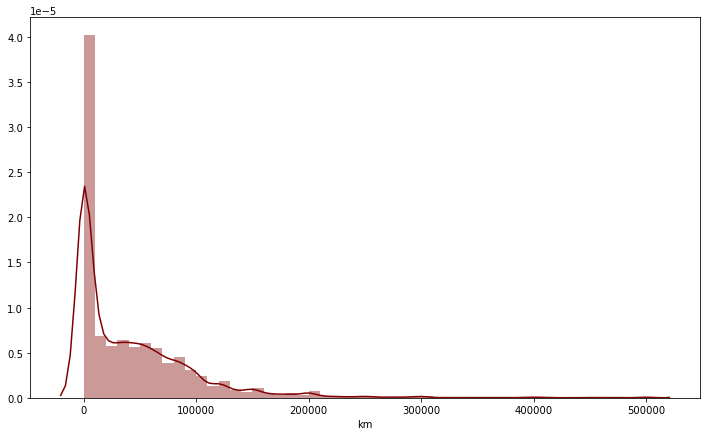

In [116]:
show_dist(car['km'])

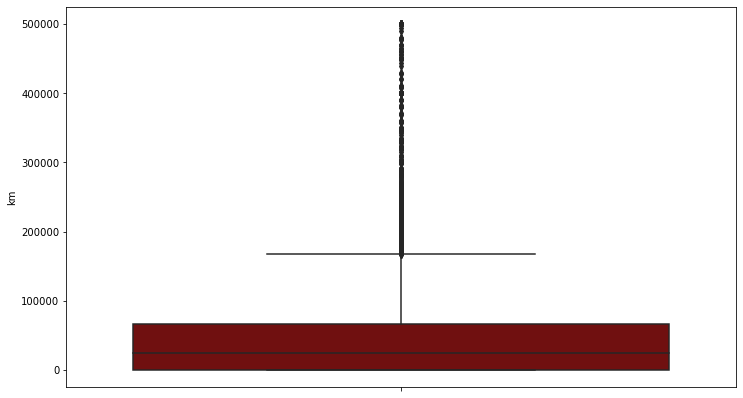

In [117]:
show_box(car['km'])

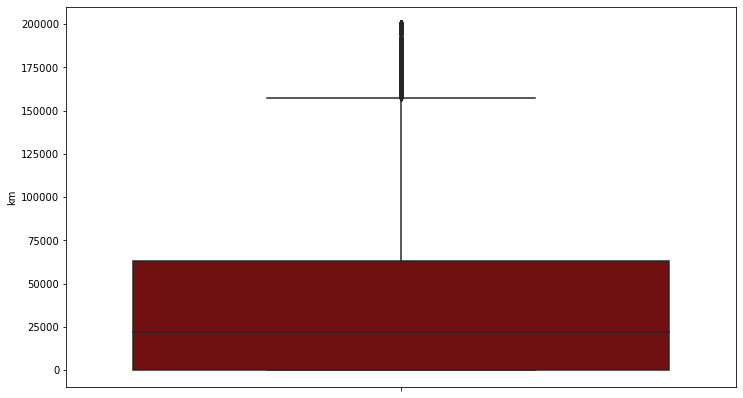

In [118]:
show_box(car['km'][car['km'] <= 200000])

    Inferences:
    + Mostly under 100k km

        Price Distribution

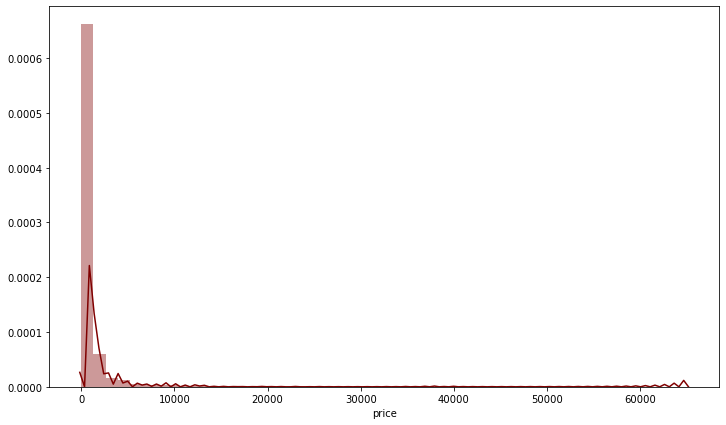

In [119]:
show_dist(car['price'])

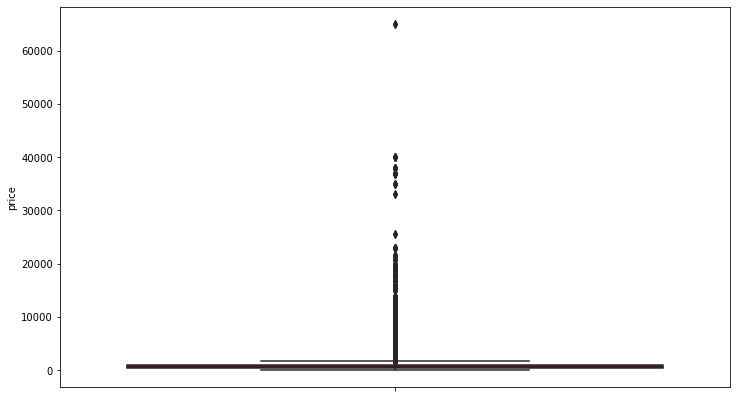

In [120]:
show_box(car['price'])

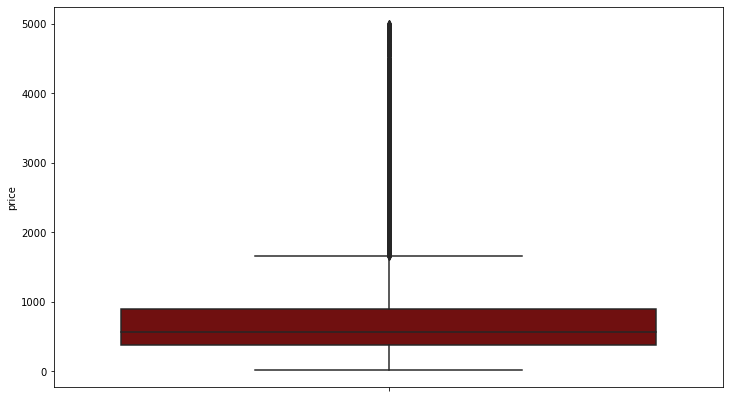

In [121]:
show_box(car['price'][car['price'] < 5000])

In [122]:
mean_price = car['price'].mean()
mean_price

1044.3156104093525

    Inferences:
    + Mostly car are sold with under 2 Billions

### 3. Feautures Extraction

#### 3.1 Dimension Reduction 

In [123]:
car['door_num'] = car['door_num'].astype('object')
car['seat_num'] = car['seat_num'].astype('object')
car.describe(exclude=[np.number])

,car_model,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,area,brand
count,27629,27629,27629,27629,27629,27629,27629,27629,27629,27629
unique,518,2,10,18,18,6,21,2,63,69
top,kia-morning,Lắp ráp trong nước,Sedan,Trắng,Đen,5,5,Xe cũ,Hà Nội,toyota
freq,1201,16359,9662,8261,9544,14167,18442,17910,11397,5155


    Dropping features with big unique number

In [124]:
car = car.drop('car_model', axis =1)
car = car.drop('area', axis =1)

    Binning along with price

In [125]:
def avg_price(df, target):
    avg = pd.DataFrame(df.groupby([target])['price'].mean().sort_values(ascending = False)).reset_index()
    return avg

In [126]:
def popular(df, target):
    count = pd.DataFrame(df[target].value_counts()).reset_index()
    count[target] = (count[target]/sum(count[target]))
    count.columns = [target,'prob']
    return count

In [127]:
def feature_overview(df,target, sort_by = 'price'):
    avg = avg_price(car,target)
    count = popular(car,target)
    overview = pd.merge(avg,count,on = target)
    overview['expect'] = overview['price'] *overview['prob']
    return overview.sort_values(by = sort_by, ascending = False).reset_index(drop =True)

In [128]:
def bins_encoder(df,target,bins):
    for i in range(len(df)):
        for j in range(len(bins)):
            if df.at[i,target] in bins[j]:
                df.at[i,target] = f'{target}_bin{j+1}'
    return df

In [129]:
target = 'seat_num'
sn_df = feature_overview(car,target)
sn_df

,seat_num,price,prob,expect
0,4,7872.234192,0.015455,121.663614
1,7,1428.758809,0.165370,236.273445
2,34,1110.000000,0.000072,0.080350
3,6,1058.371429,0.002534,2.681458
4,2,1008.180404,0.023273,23.463028
5,10,984.732143,0.002027,1.995910
6,5,869.191736,0.667487,580.174237
7,30,830.000000,0.000036,0.030041
8,15,824.400000,0.000543,0.447573
9,17,817.000000,0.000181,0.147852


    Inferences:
    + 9 Bins:
    - 28, 39, 26
    - 47
    - 12, 3, 16, 11
    - 29, 8, 9
    - 17, 15, 30, 5
    - 10, 2, 6
    - 34
    - 7
    - 4

In [130]:
sn_bin1 = [28, 39, 26]
sn_bin2 = [47]
sn_bin3 = [12, 3, 16, 11]
sn_bin4 = [29, 8, 9]
sn_bin5 = [17, 15, 30, 5]
sn_bin6 = [10, 2, 6]
sn_bin7 = [34]
sn_bin8 = [7]
sn_bin9 = [4]
sn_bins = [sn_bin1, sn_bin2, sn_bin3, sn_bin4, sn_bin5, sn_bin6, sn_bin7, sn_bin8, sn_bin9]

In [131]:
car = bins_encoder(car,target,sn_bins)

In [132]:
target = 'door_num'
dn_df = feature_overview(car,target)
dn_df

,door_num,price,prob,expect
0,6,1345.583333,0.000869,1.168844
1,5,1186.729230,0.512758,608.505302
2,2,1123.751429,0.038004,42.706540
3,4,875.349637,0.443990,388.646495
4,3,754.966387,0.004307,3.251692
5,7,507.500000,0.000072,0.036737


    Inferences:
    + 4 Bins:
    - 7
    - 3, 4
    - 2, 5
    - 6

In [133]:
dn_bin1 = [7]
dn_bin2 = [3,4]
dn_bin3 = [2,5]
dn_bin4 = [6]
dn_bins = [dn_bin1,dn_bin2,dn_bin3,dn_bin4]

In [134]:
car = bins_encoder(car,target,dn_bins)

In [135]:
target = 'out_color'
oc_df = feature_overview(car,target)
oc_df

,out_color,price,prob,expect
0,Nhiều màu,2652.406780,0.002135,5.664049
1,Đen,1690.384865,0.189402,320.163017
2,Xám,1262.846968,0.037605,47.489884
3,Hồng,1214.020408,0.003547,4.306128
4,Vàng,1069.368803,0.029932,32.008687
5,Trắng,1030.843845,0.298997,308.219661
6,Cam,984.051948,0.013935,13.712404
7,Kem,950.518519,0.003909,3.715516
8,Nâu,939.232727,0.029860,28.045423
9,Đỏ,915.783715,0.113793,104.210214


    Inferences:
    + 7 Bins:
    - -, Bạc, Ghi, Cát
    - Màu khác, Tím, Đồng
    - Xanh, Đỏ, Nâu, Kem, Cam
    - Trắng, Vàng
    - Hồng, Xám
    - Đen
    - Nhiều màu

In [136]:
oc_bin1 = ['-', 'Bạc', 'Ghi', 'Cát']
oc_bin2 = ['Màu khác', 'Tím', 'Đồng']
oc_bin3 = ['Xanh', 'Đỏ', 'Nâu', 'Kem', 'Cam']
oc_bin4 = ['Trắng', 'Vàng']
oc_bin5 = ['Hồng', 'Xám']
oc_bin6 = ['Đen']
oc_bin7 = ['Nhiều màu']
oc_bins = [oc_bin1, oc_bin2, oc_bin3, oc_bin4, oc_bin5, oc_bin6, oc_bin7]

In [137]:
car = bins_encoder(car,target,oc_bins)

In [138]:
target = 'in_color'
ic_df = feature_overview(car,target)
ic_df

,in_color,price,prob,expect
0,Tím,2493.500000,0.000145,0.360998
1,Nâu,2372.019545,0.079626,188.875566
2,Đỏ,1970.617564,0.012776,25.177458
3,Vàng,1906.777778,0.015636,29.813891
4,Cam,1726.405660,0.003837,6.623439
5,Màu khác,1257.418788,0.059720,75.092873
6,Kem,1015.461354,0.226646,230.150168
7,Đen,965.409262,0.345434,333.485323
8,Đồng,862.191489,0.001701,1.466684
9,Xanh,766.643357,0.005176,3.967932


    Inferences:
    + 9 Bins:
    - Hồng, Bạc
    - Xám, Cát, Ghi
    - Trắng, -
    - Nhiều màu, Xanh
    - Đồng, Đen
    - Màu khác, Kem
    - Cam
    - Vàng, Đỏ
    - Nâu, Tím

In [139]:
ic_bin1 = ['Hồng', 'Bạc']
ic_bin2 = ['Xám', 'Cát', 'Ghi']
ic_bin3 = ['Trắng', '-']
ic_bin4 = ['Nhiều màu', 'Xanh']
ic_bin5 = ['Đồng', 'Đen']
ic_bin6 = ['Màu khác', 'Kem']
ic_bin7 = ['Cam']
ic_bin8 = ['Vàng', 'Đỏ']
ic_bin9 = ['Nâu', 'Tím']
ic_bins = [ic_bin1,ic_bin2,ic_bin3,ic_bin4,ic_bin5,ic_bin6,ic_bin7,ic_bin8,ic_bin9]

In [140]:
car = bins_encoder(car,target,ic_bins)

In [141]:
target = 'car_type'
ct_df = feature_overview(car,target)
ct_df

,car_type,price,prob,expect
0,Coupe,3958.971223,0.005031,19.917369
1,Convertible/Cabriolet,3362.477273,0.003185,10.709689
2,SUV,1809.043522,0.290239,525.054110
3,Sedan,821.092631,0.349705,287.140215
4,Bán tải / Pickup,761.731142,0.067176,51.169894
5,Van/Minivan,733.060587,0.056752,41.602628
6,Crossover,621.856405,0.077129,47.963227
7,Truck,493.391766,0.027254,13.446886
8,Hatchback,383.381791,0.123240,47.248000
9,Wagon,219.625000,0.000290,0.063593


    Inferences:
    + 7 Bins:
    - Wagon, Hatchback
    - Truck
    - Crossover
    - Van/Minivan, Bán tải / Pickup
    - Sedan
    - SUV
    - Convertible/Cabriolet, Coupe

In [142]:
ct_bin1 = ['Wagon', 'Hatchback']
ct_bin2 = ['Truck']
ct_bin3 = ['Crossover']
ct_bin4 = ['Van/Minivan', 'Bán tải / Pickup']
ct_bin5 = ['Sedan']
ct_bin6 = ['SUV']
ct_bin7 = ['Convertible/Cabriolet', 'Coupe']
ct_bins = [ct_bin1,ct_bin2,ct_bin3,ct_bin4,ct_bin5,ct_bin6,ct_bin7]

In [143]:
car = bins_encoder(car,target,ct_bins)

In [144]:
target = 'brand'
brand_df = feature_overview(car,target)
brand_df

,brand,price,prob,expect
0,rolls_royce,29742.652174,0.001665,49.519056
1,ferrari,18456.714286,0.000507,9.352275
2,lamborghini,17279.833333,0.000869,15.010170
3,bentley,10719.518519,0.001954,20.950957
4,lincoln,7323.641026,0.002823,20.675522
...,...,...,...,...
64,mekong,76.714286,0.000507,0.038872
65,lifan,71.000000,0.000145,0.010279
66,vinaxuki,69.500000,0.000724,0.050309
67,dodge,48.000000,0.000072,0.003475


In [145]:
brand_df['price'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count       69.000000
mean      2242.843567
std       4771.486148
min         47.250000
10%         87.000000
20%        177.342857
30%        371.503734
40%        526.292216
50%        635.928734
60%        755.733333
70%       1277.319837
80%       2400.352803
90%       5056.289655
max      29742.652174
Name: price, dtype: float64

In [146]:
brand_bin1 = brand_df[brand_df['price'] <= 87.000000]['brand'].tolist()

brand_bin2 = brand_df[brand_df['price'] > 87.000000]
brand_bin2 = brand_bin2[brand_bin2['price'] <= 177.342857]['brand'].tolist()

brand_bin3 = brand_df[brand_df['price'] > 177.342857]
brand_bin3 = brand_bin3[brand_bin3['price'] <= 371.503734]['brand'].tolist()

brand_bin4 = brand_df[brand_df['price'] > 371.503734]
brand_bin4 = brand_bin4[brand_bin4['price'] <= 526.292216]['brand'].tolist()

brand_bin5 = brand_df[brand_df['price'] > 526.292216]
brand_bin5 = brand_bin5[brand_bin5['price'] <= 635.928734]['brand'].tolist()
    
brand_bin6 = brand_df[brand_df['price'] > 635.928734 ]
brand_bin6 = brand_bin6[brand_bin6['price'] <= 755.733333]['brand'].tolist()
    
brand_bin7 = brand_df[brand_df['price'] >  755.733333]
brand_bin7 = brand_bin7[brand_bin7['price'] <= 1277.319837]['brand'].tolist()
    
brand_bin8 = brand_df[brand_df['price'] > 1277.319837]
brand_bin8 = brand_bin8[brand_bin8['price'] <= 2400.352803]['brand'].tolist()
    
brand_bin9 = brand_df[brand_df['price'] > 2400.352803]
brand_bin9 = brand_bin9[brand_bin9['price'] <= 5091.307837]['brand'].tolist()
    
brand_bin10 = brand_df[brand_df['price'] > 5091.307837]['brand'].tolist()

brand_bins = [brand_bin1,brand_bin2,brand_bin3,brand_bin4,brand_bin5,brand_bin6,brand_bin7,brand_bin8,brand_bin9,brand_bin10]

In [147]:
car = bins_encoder(car,target,brand_bins)
car

,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price,brand
0,0,Nhập khẩu,car_type_bin6,out_color_bin6,in_color_bin6,door_num_bin3,seat_num_bin8,Xe mới,2016,4665,brand_bin8
1,9600,Nhập khẩu,car_type_bin6,out_color_bin4,in_color_bin2,door_num_bin3,seat_num_bin8,Xe cũ,2015,3400,brand_bin8
2,9700,Nhập khẩu,car_type_bin6,out_color_bin4,in_color_bin6,door_num_bin3,seat_num_bin8,Xe cũ,2015,3450,brand_bin8
3,86000,Nhập khẩu,car_type_bin6,out_color_bin6,in_color_bin5,door_num_bin3,seat_num_bin8,Xe cũ,2008,620,brand_bin8
4,80000,Nhập khẩu,car_type_bin6,out_color_bin6,in_color_bin5,door_num_bin3,seat_num_bin8,Xe cũ,2007,555,brand_bin8
...,...,...,...,...,...,...,...,...,...,...,...
27624,57000,Lắp ráp trong nước,car_type_bin2,out_color_bin3,in_color_bin4,door_num_bin3,seat_num_bin3,Xe cũ,2015,285,brand_bin3
27625,150000,Lắp ráp trong nước,car_type_bin2,out_color_bin3,in_color_bin4,door_num_bin3,seat_num_bin3,Xe cũ,2007,45,brand_bin3
27626,0,Nhập khẩu,car_type_bin2,out_color_bin3,in_color_bin2,door_num_bin3,seat_num_bin3,Xe mới,2019,500,brand_bin3
27627,13000,Lắp ráp trong nước,car_type_bin2,out_color_bin3,in_color_bin6,door_num_bin3,seat_num_bin3,Xe cũ,2018,200,brand_bin3


In [148]:
car.describe(exclude=[np.number])

,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,brand
count,27629,27629,27629,27629,27629,27629,27629,27629
unique,2,7,7,9,4,9,2,10
top,Lắp ráp trong nước,car_type_bin5,out_color_bin4,in_color_bin5,door_num_bin3,seat_num_bin5,Xe cũ,brand_bin6
freq,16359,9662,9088,9591,15217,18463,17910,7909


#### 3.2 Dummy

In [149]:
def dummy(df,target):
    dum = pd.get_dummies(df[target])
    df = df.drop(target, axis = 1)
    df = pd.concat([df, dum], axis =1)
    return df

In [150]:
car = dummy(car,'imp_exp')
car = dummy(car,'car_type')
car = dummy(car,'out_color')
car = dummy(car,'in_color')
car = dummy(car,'door_num')
car = dummy(car,'seat_num')
car = dummy(car,'new_old')
car = dummy(car,'brand')

### 4. Cross Validation

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
def show_heat(target, size = (25,20)):
    plt.figure(figsize= size)
    sns.heatmap(target,cmap="YlGnBu")
    plt.show()

In [153]:
price = car['price']
car = car.drop(['price'],axis =1)
car['price'] = price
car_train, car_test = train_test_split(car, random_state = 85)

In [154]:
scaler = MinMaxScaler()
numeric_cols = ['km','car_year']
car_train[numeric_cols] = scaler.fit_transform(car_train[numeric_cols])
car_test[numeric_cols] = scaler.fit_transform(car_test[numeric_cols])
car_train.head()

,km,car_year,Lắp ráp trong nước,Nhập khẩu,car_type_bin1,car_type_bin2,car_type_bin3,car_type_bin4,car_type_bin5,car_type_bin6,...,brand_bin10,brand_bin2,brand_bin3,brand_bin4,brand_bin5,brand_bin6,brand_bin7,brand_bin8,brand_bin9,price
1777,0.340,0.433333,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,58
9426,0.000,0.933333,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,665
12199,0.138,0.733333,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,326
7743,0.000,1.000000,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,540
26674,0.193,0.033333,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,50


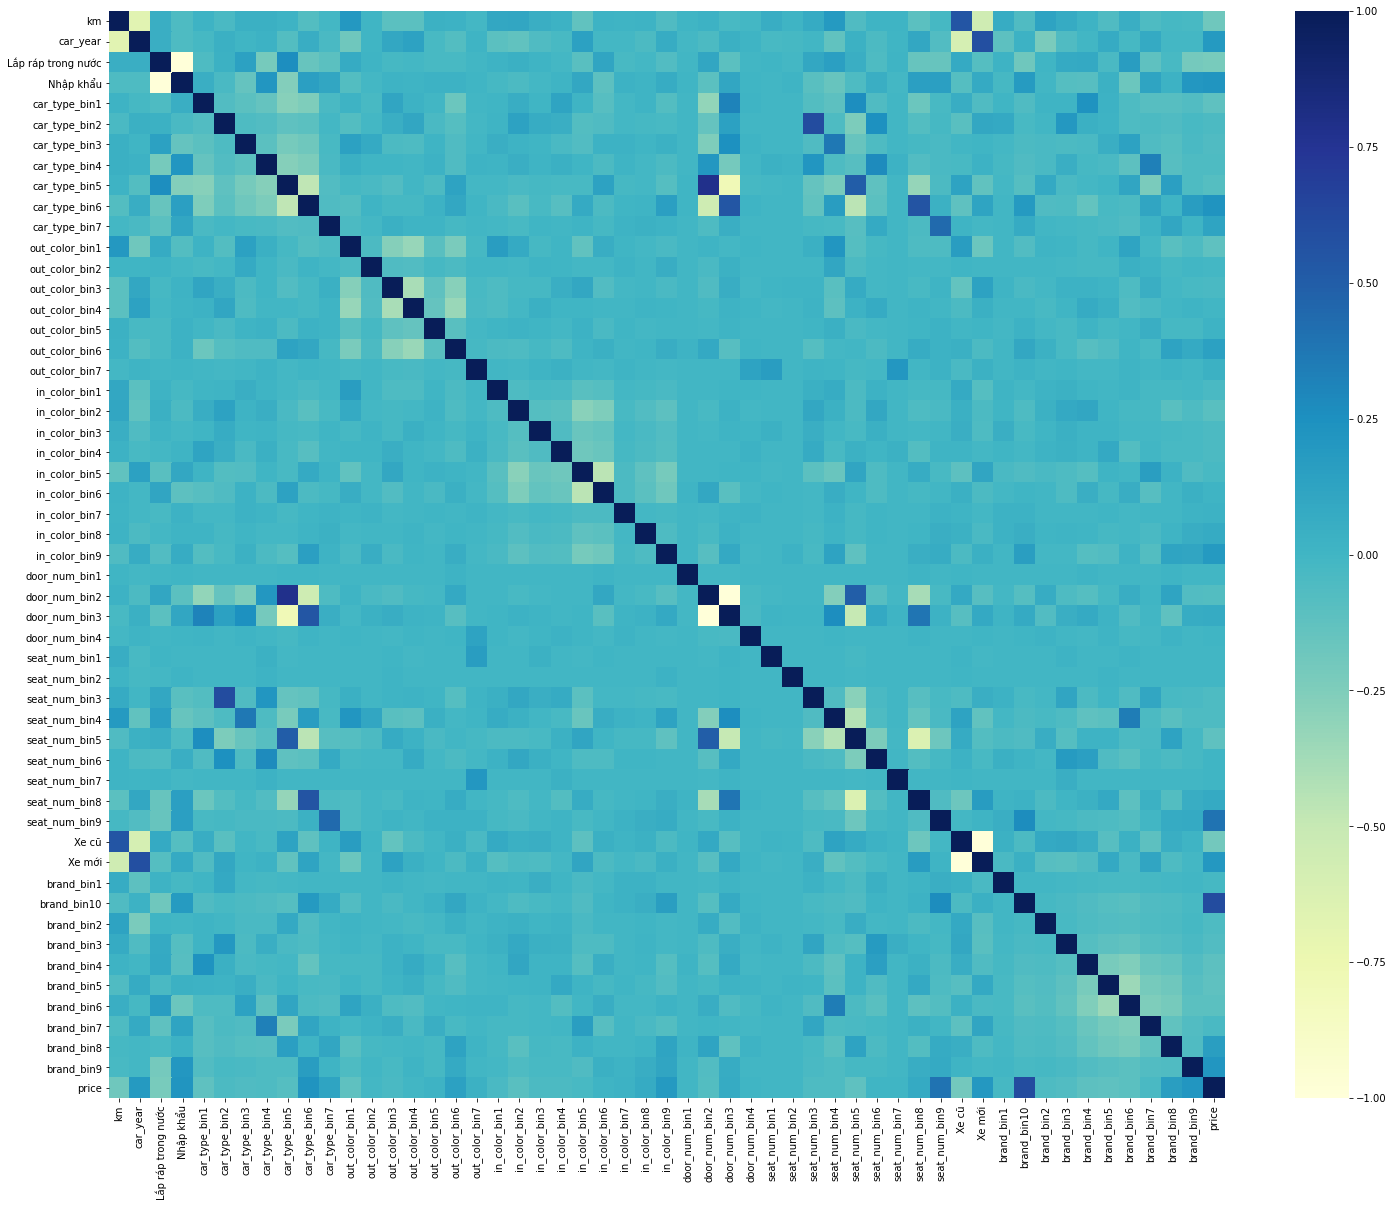

In [155]:
corr = car_train.corr()
show_heat(corr)

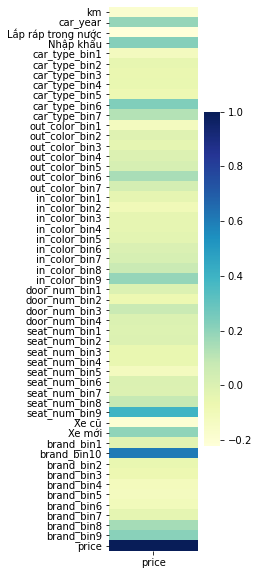

In [156]:
show_heat(corr[['price']], size = (2,10))

In [157]:
X_train = car_train.drop(['price'], axis = 1)
y_train = car_train['price']

X_test = car_test.drop(['price'], axis = 1)
y_test = car_test['price']

### 5. Model Building

In [158]:
def build_model(X, y, constant = False):
    if constant ==  True:
        X = sm.add_constant(X)
    res = sm.OLS(y,X).fit()
    return res

In [159]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [160]:
def drop_high_pvalue(X,y,threshold = 0.05):
    max_pval = 1
    drop_list =[]
    model = None
    while max_pval > threshold:
        X_new = X.drop(drop_list, axis=1)
        model = build_model(X_new,y)

        df_pval = pd.DataFrame(model.pvalues).reset_index()
        df_pval.columns=['Atrributes','Pvalues']
        df_pval = df_pval.sort_values(by='Pvalues')

        max_pval = np.max(df_pval['Pvalues'])
        max_pval_index = np.argmax(df_pval['Pvalues'])

        drop_att = df_pval.iloc[max_pval_index]['Atrributes']
        drop_list.append(drop_att)
    cols = get_columns(model)
    model = build_model(X[cols],y, True)
    return model

In [161]:
def get_columns(model):
    return model.params.index.to_list()

In [162]:
model_1 = build_model(X_train,y_train, True)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     597.2
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:18:54   Log-Likelihood:            -1.7905e+05
No. Observations:               20721   AIC:                         3.582e+05
Df Residuals:                   20676   BIC:                         3.586e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                182.5621    118.467      1.541      0.123     -49.642     414.766
km                   243.4053    117.827      2.066      0.039      12.455     474.355
car_year            2067.1305     87.605     23.596      0.000    1895.418    2238.843
Lắp ráp trong nước   -11.8096     60.816     -0.194      0.846    -131.013     107.394
Nhập khẩu            194.3717     59.953      3.242      0.001      76.859     311.885
car_type_bin1        205.1175     42.310      4.848      0.000     122.186     288.049
car_type_bin2       -129.3063     77.227     -1.674      0.094    -280.677      22.064
car_type_bin3        195.6509     46.056      4.248      0.000     105.378     285.924
car_type_bin4         64.3905     42.060      1.531      0.126     -18.051     146.832
car_type_bin5        189.2287     46.446      4.074      0.000      98.191     280.267
car_type_bin6        369.0072     37.892      9.738      0.000     294.737     443.278
car_type_bin7       -711.5264    105.026     -6.775      0.000    -917.387    -505.666
out_color_bin1       -45.6093     44.188     -1.032      0.302    -132.221      41.002
out_color_bin2      -164.1495     93.833     -1.749      0.080    -348.069      19.770
out_color_bin3      -102.0044     42.919     -2.377      0.017    -186.129     -17.880
out_color_bin4       -49.9888     42.232     -1.184      0.237    -132.767      32.789
out_color_bin5        79.0059     55.992      1.411      0.158     -30.743     188.755
out_color_bin6       205.6843     43.823      4.694      0.000     119.788     291.580
out_color_bin7       259.6239    184.704      1.406      0.160    -102.410     621.658
in_color_bin1         21.6413     71.277      0.304      0.761    -118.067     161.349
in_color_bin2        -32.1551     34.161     -0.941      0.347     -99.113      34.802
in_color_bin3        -27.4385     47.010     -0.584      0.559    -119.582      64.705
in_color_bin4        -93.8173     42.441     -2.211      0.027    -177.005     -10.630
in_color_bin5        -75.7379     29.666     -2.553      0.011    -133.885     -17.591
in_color_bin6         -2.3954     29.575     -0.081      0.935     -60.365      55.574
in_color_bin7         20.8622    134.362      0.155      0.877    -242.498     284.223
in_color_bin8        316.9265     56.604      5.599      0.000     205.978     427.875
in_color_bin9         54.6763     40.298      1.357      0.175     -24.311     133.663
door_num_bin1       -219.6689    752.094     -0.292      0.770   -1693.833    1254.495
door_num_bin2        250.9973    234.697      1.069      0.285    -209.028     711.022
door_num_bin3        105.1106    233.365      0.450      0.652    -352.304     562.525
door_num_bin4         46.1232    322.638      0.143      0.886    -586.273     678.519
seat_num_bin1       -406.1710    739.6

In [163]:
model_2 =  drop_high_pvalue(X_train,y_train)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     847.6
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:18:55   Log-Likelihood:            -1.7906e+05
No. Observations:               20721   AIC:                         3.582e+05
Df Residuals:                   20689   BIC:                         3.584e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -14.8860    123.181     -0.121      0.904    -256.330     226.557
km               239.0546    117.423      2.036      0.042       8.897     469.213
car_year        2080.8774     86.525     24.049      0.000    1911.281    2250.474
Nhập khẩu        207.8424     23.440      8.867      0.000     161.898     253.786
car_type_bin1    349.8209     90.488      3.866      0.000     172.458     527.184
car_type_bin3    340.2099     94.829      3.588      0.000     154.337     526.083
car_type_bin4    206.9563     85.618      2.417      0.016      39.137     374.775
car_type_bin5    332.7048     98.345      3.383      0.001     139.940     525.470
car_type_bin6    516.4792     90.135      5.730      0.000     339.808     693.150
car_type_bin7   -569.9989    143.570     -3.970      0.000    -851.407    -288.591
out_color_bin3   -52.9764     23.962     -2.211      0.027     -99.944      -6.009
out_color_bin5   127.0203     48.707      2.608      0.009      31.551     222.490
out_color_bin6   255.1061     26.631      9.579      0.000     202.907     307.305
in_color_bin4    -86.4449     41.261     -2.095      0.036    -167.320      -5.569
in_color_bin5    -72.8698     21.943     -3.321      0.001    -115.880     -29.860
in_color_bin8    317.9956     58.958      5.394      0.000     202.433     433.558
door_num_bin2    148.4138     47.965      3.094      0.002      54.399     242.428
seat_num_bin3   -461.9663     82.296     -5.613      0.000    -623.273    -300.660
seat_num_bin4   -351.1731     81.362     -4.316      0.000    -510.649    -191.697
seat_num_bin5   -678.8978     72.730     -9.335      0.000    -821.453    -536.342
seat_num_bin8   -429.8968     75.830     -5.669      0.000    -578.529    -281.265
seat_num_bin9   3348.5480    111.530     30.024      0.000    3129.940    3567.156
Xe mới           401.0577     26.657     15.045      0.000     348.807     453.308
brand_bin1     -1516.2834    212.930     -7.121      0.000   -1933.643   -1098.923
brand_bin10     5942.6036     73.960     80.348      0.000    5797.635    6087.572
brand_bin2      -959.0819     86.165    -11.131      0.000   -1127.972    -790.192
brand_bin3     -1330.8948     59.786    -22.261      0.000   -1448.079   -1213.710
brand_bin4     -1348.6304     42.897    -31.439      0.000   -1432.712   -1264.549
brand_bin5     -1357.4781     37.530    -36.171      0.000   -1431.040   -1283.917
brand_bin6     -1185.1498     37.134    -31.916      0.000   -1257.935   -1112.365
brand_bin7     -1200.5950     43.176    -27.807      0.000   -1285.223   -1115.967
brand_bin9      1252.5353     66.906     18.721      0.000    1121.394    1383.677
==============================================================================
Omnibus:                    32361.499   Durbin-Watson:                   2.025
Prob(Omnibus):      

In [164]:
X_train_2 = sm.add_constant(X_train)[get_columns(model_2)]
checkVIF(X_train_2)

,Features,VIF
0,const,167.33
7,car_type_bin5,24.23
8,car_type_bin6,18.50
19,seat_num_bin5,12.96
4,car_type_bin1,9.87
20,seat_num_bin8,8.77
6,car_type_bin4,8.66
5,car_type_bin3,7.03
16,door_num_bin2,6.27
18,seat_num_bin4,5.67


    Inferences:
    + Dropping 'car_type_bin5' due to high VIF 

In [165]:
X_train_3 = X_train_2.drop(['car_type_bin5'], axis =1)
model_3 = drop_high_pvalue(X_train_3,y_train)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     971.9
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:18:56   Log-Likelihood:            -1.7907e+05
No. Observations:               20721   AIC:                         3.582e+05
Df Residuals:                   20693   BIC:                         3.584e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            204.7487    103.783      1.973      0.049       1.326     408.172
km               240.9393    117.008      2.059      0.039      11.594     470.284
car_year        2047.7417     85.900     23.839      0.000    1879.372    2216.112
Nhập khẩu        181.7300     21.675      8.384      0.000     139.246     224.214
car_type_bin6    203.8001     31.753      6.418      0.000     141.561     266.039
car_type_bin7   -849.3918    120.351     -7.058      0.000   -1085.290    -613.494
out_color_bin3   -56.7219     23.932     -2.370      0.018    -103.630      -9.814
out_color_bin5   129.8485     48.699      2.666      0.008      34.395     225.302
out_color_bin6   254.0176     26.532      9.574      0.000     202.012     306.023
in_color_bin4    -85.2569     41.097     -2.075      0.038    -165.811      -4.703
in_color_bin5    -72.6424     21.943     -3.311      0.001    -115.652     -29.633
in_color_bin8    320.1951     58.965      5.430      0.000     204.619     435.771
door_num_bin2    137.1393     25.732      5.330      0.000      86.703     187.575
seat_num_bin3   -524.1694     77.057     -6.802      0.000    -675.208    -373.131
seat_num_bin4   -214.8867     72.343     -2.970      0.003    -356.684     -73.089
seat_num_bin5   -520.8240     61.168     -8.515      0.000    -640.719    -400.929
seat_num_bin8   -284.2657     67.079     -4.238      0.000    -415.745    -152.786
seat_num_bin9   3493.5036    105.412     33.141      0.000    3286.887    3700.120
Xe mới           396.8429     26.582     14.929      0.000     344.740     448.945
brand_bin1     -1583.7516    211.865     -7.475      0.000   -1999.023   -1168.480
brand_bin10     5950.8036     73.797     80.637      0.000    5806.155    6095.452
brand_bin2      -971.5823     86.036    -11.293      0.000   -1140.219    -802.945
brand_bin3     -1363.9588     59.116    -23.073      0.000   -1479.830   -1248.088
brand_bin4     -1356.6020     42.331    -32.047      0.000   -1439.574   -1273.630
brand_bin5     -1365.9126     37.406    -36.516      0.000   -1439.231   -1292.594
brand_bin6     -1190.6641     37.013    -32.169      0.000   -1263.213   -1118.115
brand_bin7     -1228.7559     41.093    -29.902      0.000   -1309.302   -1148.210
brand_bin9      1254.7220     66.827     18.776      0.000    1123.736    1385.708
==============================================================================
Omnibus:                    32382.646   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44420831.957
Skew:                           9.634   Prob(JB):                         0.00
Kurtosis:                     229.007   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assum

In [166]:
X_train_3 = sm.add_constant(X_train)[get_columns(model_3)]
checkVIF(X_train_3)

,Features,VIF
0,const,118.70
15,seat_num_bin5,9.16
16,seat_num_bin8,6.85
14,seat_num_bin4,4.48
25,brand_bin6,3.08
24,brand_bin5,2.77
13,seat_num_bin3,2.43
23,brand_bin4,2.37
4,car_type_bin6,2.29
2,car_year,2.27


    Inferences:
    + Dropping 'seat_num_bin5' due to high VIF

In [167]:
X_train_4 = X_train_3.drop(['seat_num_bin5'], axis =1)
model_4 = drop_high_pvalue(X_train_4,y_train)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:18:57   Log-Likelihood:            -1.7910e+05
No. Observations:               20721   AIC:                         3.583e+05
Df Residuals:                   20696   BIC:                         3.585e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -170.4256     73.888     -2.307      0.021    -315.252     -25.599
car_year        1938.2822     74.698     25.948      0.000    1791.868    2084.696
Nhập khẩu        194.7513     21.517      9.051      0.000     152.576     236.926
car_type_bin6    182.5887     31.512      5.794      0.000     120.823     244.354
car_type_bin7   -763.3692    120.092     -6.357      0.000    -998.759    -527.980
out_color_bin3   -66.5057     23.932     -2.779      0.005    -113.414     -19.597
out_color_bin5   126.2721     48.772      2.589      0.010      30.674     221.870
out_color_bin6   250.9833     26.532      9.460      0.000     198.978     302.989
in_color_bin4    -94.1217     41.143     -2.288      0.022    -174.765     -13.479
in_color_bin5    -79.7551     21.829     -3.654      0.000    -122.542     -36.968
in_color_bin8    313.3556     59.034      5.308      0.000     197.644     429.067
door_num_bin2    106.3201     25.318      4.199      0.000      56.695     155.945
seat_num_bin4    294.5529     42.244      6.973      0.000     211.752     377.354
seat_num_bin8    209.4706     34.187      6.127      0.000     142.462     276.479
seat_num_bin9   3945.7154     90.770     43.469      0.000    3767.799    4123.631
Xe mới           390.1080     25.693     15.183      0.000     339.747     440.469
brand_bin1     -1491.5308    211.925     -7.038      0.000   -1906.921   -1076.141
brand_bin10     5971.8033     73.883     80.828      0.000    5826.987    6116.620
brand_bin2      -976.1894     86.148    -11.332      0.000   -1145.046    -807.333
brand_bin3     -1272.7399     58.101    -21.906      0.000   -1386.623   -1158.857
brand_bin4     -1317.5340     42.100    -31.295      0.000   -1400.053   -1235.015
brand_bin5     -1362.2575     37.458    -36.368      0.000   -1435.678   -1288.837
brand_bin6     -1188.1898     37.063    -32.058      0.000   -1260.837   -1115.542
brand_bin7     -1217.1923     40.955    -29.720      0.000   -1297.468   -1136.917
brand_bin9      1253.8198     66.942     18.730      0.000    1122.608    1385.032
==============================================================================
Omnibus:                    32437.416   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44546057.369
Skew:                           9.669   Prob(JB):                         0.00
Kurtosis:                     229.321   Cond. No.                         37.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
X_train_4 = sm.add_constant(X_train)[get_columns(model_4)]
checkVIF(X_train_4)

,Features,VIF
0,const,59.95
22,brand_bin6,3.07
21,brand_bin5,2.77
20,brand_bin4,2.33
3,car_type_bin6,2.25
23,brand_bin7,2.11
13,seat_num_bin8,1.77
11,door_num_bin2,1.74
1,car_year,1.71
15,Xe mới,1.65


In [169]:
final_model = build_model(X_train_4, y_train)

In [170]:
y_pred = final_model.predict(sm.add_constant(X_test)[get_columns(final_model)])
r2_score(y_test,y_pred)

0.5566036961549959

    The model fit 55% on test set which is a good appoach due to almost same with the train set

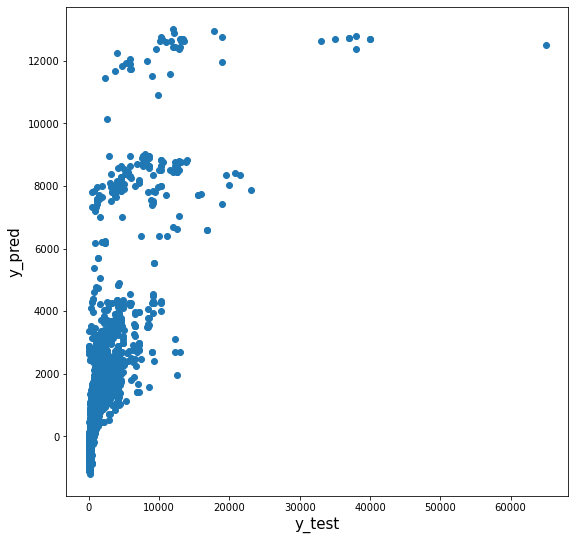

In [171]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=15)          
plt.ylabel('y_pred', fontsize=15)
plt.show()

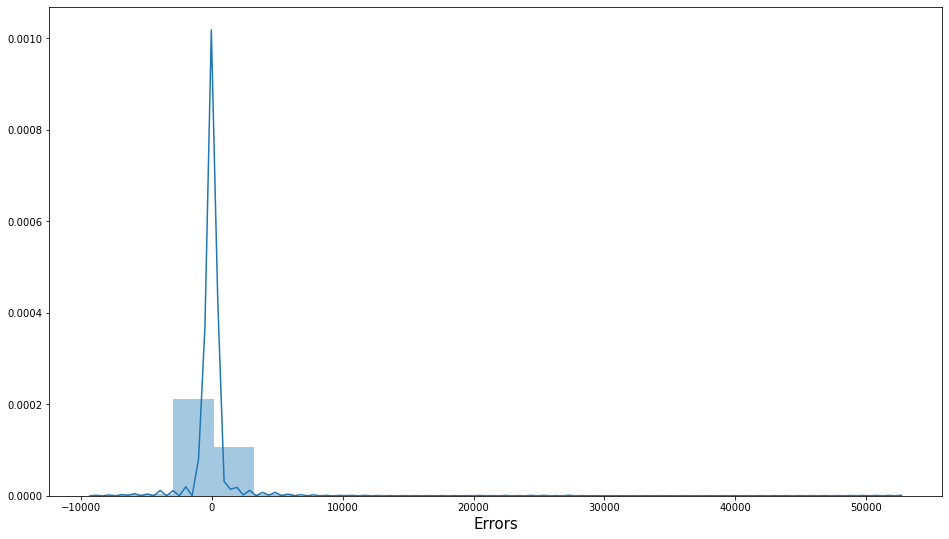

In [172]:
plt.figure(figsize=(16,9))
sns.distplot((np.array(y_test.to_list()) - np.array(y_pred.to_list())), bins = 20)
plt.xlabel('Errors', fontsize = 15) 
plt.show()

    Polynomial K = 2

In [173]:
def mapping_columns(poly_cols, org_cols):
    poly_cols[0] = 'const'
    for i in range(len(poly_cols) -1, 0, -1):
        for j in range(len(org_cols)-1,-1,-1):
            poly_cols[i] = poly_cols[i].replace(f'x{j}',org_cols[j])
    return poly_cols

In [174]:
poly = PolynomialFeatures(degree= 2)
poly2 = poly.fit_transform(X_train)
cols_poly2 = poly.get_feature_names()
cols_poly2 = mapping_columns(cols_poly2, X_train.columns)

In [185]:
y_train = y_train.to_list()
X2_train = pd.DataFrame(poly2, columns= cols_poly2)
X2_train.head()

,const,km,car_year,Lắp ráp trong nước,Nhập khẩu,car_type_bin1,car_type_bin2,car_type_bin3,car_type_bin4,car_type_bin5,...,brand_bin6^2,brand_bin6 brand_bin7,brand_bin6 brand_bin8,brand_bin6 brand_bin9,brand_bin7^2,brand_bin7 brand_bin8,brand_bin7 brand_bin9,brand_bin8^2,brand_bin8 brand_bin9,brand_bin9^2
0,1.0,0.340,0.433333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000,0.933333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.138,0.733333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.193,0.033333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    First, let try the optimized model

In [188]:
model_5 = drop_high_pvalue(X2_train,y_train)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     383.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:20:51   Log-Likelihood:            -1.7027e+05
No. Observations:               20721   AIC:                         3.410e+05
Df Residuals:                   20490   BIC:                         3.428e+05
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             -275.8557    315.918     -0.873      0.383    -895.080     343.369
km                                -544.4096    135.524     -4.017      0.000    -810.048    -278.771
Lắp ráp trong nước                 344.3868     61.205      5.627      0.000     224.421     464.353
car_type_bin1                     -520.3422    114.336     -4.551      0.000    -744.449    -296.235
car_type_bin6                      365.1256     62.382      5.853      0.000     242.851     487.400
car_type_bin7                     1691.3496    337.677      5.009      0.000    1029.476    2353.223
out_color_bin5                    -275.4178     30.136     -9.139      0.000    -334.488    -216.348
in_color_bin3                      261.3387     72.548      3.602      0.000     119.140     403.538
in_color_bin7                     1256.4156    125.775      9.989      0.000    1009.887    1502.944
in_color_bin9                      -90.4731     27.900     -3.243      0.001    -145.159     -35.787
door_num_bin2                     -500.6225    179.762     -2.785      0.005    -852.970    -148.275
door_num_bin3                     -227.5932    162.220     -1.403      0.161    -545.557      90.371
seat_num_bin5                      412.7458     84.652      4.876      0.000     246.821     578.671
Xe mới                             492.7123     42.452     11.606      0.000     409.503     575.922
brand_bin1                         502.5150     99.539      5.048      0.000     307.410     697.620
brand_bin10                      -2433.4407    191.118    -12.733      0.000   -2808.047   -2058.834
brand_bin5                         285.5969     58.203      4.907      0.000     171.514     399.680
brand_bin9                        -349.1766     84.675     -4.124      0.000    -515.145    -183.208
km car_type_bin1                   913.3716    316.064      2.890      0.004     293.861    1532.882
km car_type_bin2                  1355.8551    371.166      3.653      0.000     628.341    2083.369
km car_type_bin3                  1103.1624    332.576      3.317      0.001     451.287    1755.038
km car_type_bin4                  1258.8993    299.006      4.210      0.000     672.824    1844.974
km car_type_bin5                  1149.1471    291.651      3.940      0.000     577.488    1720.806
km car_type_bin6                   672.1382    298.645      2.251      0.024      86.770    1257.507
km car_type_bin7                 -6996.9833   1692.412     -4.134      0.000   -1.03e+04   -3679.721
km Xe cũ                          -544.4096    135.524     -4.017      0.000    -810.048    -278.771
km brand_bin8                    -1219.9299    261.856     -4.659      0.000   -1733.189    -706.671
car_year^2                        2334.4105    212.18

In [192]:
y_test = y_test.to_list()
poly2 = poly.fit_transform(X_test)
cols_poly2 = poly.get_feature_names()
cols_poly2 = mapping_columns(cols_poly2, X_test.columns)
X_test = pd.DataFrame(poly2, columns= cols_poly2)
X_test = X_test[get_columns(model_5)]

In [194]:
y_pred = model_5.predict(X_test)
r2_score(y_test,y_pred)

0.7524763266462484

    The optimized has F-statistic of 383 and 343 columns in 1431, so what about the ordinary model

In [197]:
model_6 = build_model(X2_train,y_train)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:28:04   Log-Likelihood:            -1.7013e+05
No. Observations:               20721   AIC:                         3.416e+05
Df Residuals:                   20069   BIC:                         3.467e+05
Df Model:                         651                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               395.9513   1221.651      0.324      0.746   -1998.586    2790.488
km                                -1937.4796   5245.238     -0.369      0.712   -1.22e+04    8343.618
car_year                           -381.3269   3687.897     -0.103      0.918   -7609.909    6847.255
Lắp ráp trong nước                  319.7421    777.648      0.411      0.681   -1204.512    1843.996
Nhập khẩu                            76.2093    494.008      0.154      0.877    -892.088    1044.506
car_type_bin1                      -534.1850    373.732     -1.429      0.153   -1266.730     198.360
car_type_bin2                      -181.4016    156.898     -1.156      0.248    -488.935     126.131
car_type_bin3                      -339.8318    201.966     -1.683      0.092    -735.702      56.038
car_type_bin4                        45.0347    240.277      0.187      0.851    -425.928     515.997
car_type_bin5                      -240.8320    216.775     -1.111      0.267    -665.728     184.064
car_type_bin6                        47.2420    341.907      0.138      0.890    -622.924     717.408
car_type_bin7                      1599.9250    244.367      6.547      0.000    1120.945    2078.905
out_color_bin1                      -64.6077    219.233     -0.295      0.768    -494.322     365.107
out_color_bin2                       37.6182    201.033      0.187      0.852    -356.423     431.659
out_color_bin3                       41.7757    224.745      0.186      0.853    -398.744     482.295
out_color_bin4                      -70.6091    258.146     -0.274      0.784    -576.596     435.378
out_color_bin5                     -216.2219    148.078     -1.460      0.144    -506.468      74.024
out_color_bin6                       23.7231    253.340      0.094      0.925    -472.845     520.291
out_color_bin7                      644.2731    726.331      0.887      0.375    -779.395    2067.941
in_color_bin1                        40.3952    235.655      0.171      0.864    -421.508     502.299
in_color_bin2                        39.0296    248.563      0.157      0.875    -448.174     526.233
in_color_bin3                       148.2449    193.349      0.767      0.443    -230.735     527.225
in_color_bin4                        -6.2229    201.755     -0.031      0.975    -401.680     389.234
in_color_bin5                       -47.2796    221.897     -0.213      0.831    -482.216     387.657
in_color_bin6                       -73.9540     87.412     -0.846      0.398    -245.289      97.381
in_color_bin7                       551.1092    471.278      1.169      0.242    -372.635    1474.854
in_color_bin8                       -93.1675    124.055     -0.751      0.453    -336.326     149.991
in_color_bin9          

In [203]:
X_test = car_test.drop(['price'], axis = 1)
poly2 = poly.fit_transform(X_test)
cols_poly2 = poly.get_feature_names()
cols_poly2 = mapping_columns(cols_poly2, X_test.columns)
X_test = pd.DataFrame(poly2, columns= cols_poly2)

In [205]:
y_pred = model_6.predict(X_test)
r2_score(y_test,y_pred)

0.7507241925266228

    Conclusion on Polynomial with K = 2:
    Clearly that the 2 polynommial model having almost the same R2 score (0.75 on the test set) but the optimized one (model_5) is much better due to the F-statistic = 384 >> 134